In [ ]:
import cv2
import os
import numpy as np
import torch
import torchvision.transforms as T
from torchvision.models.segmentation import deeplabv3_resnet101
import matplotlib.pyplot as plt

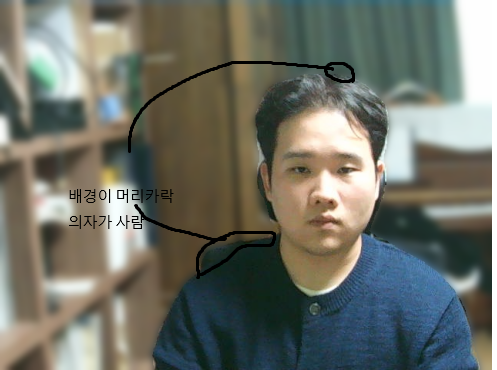

In [66]:
from IPython.display import Image
Image("output1.png")

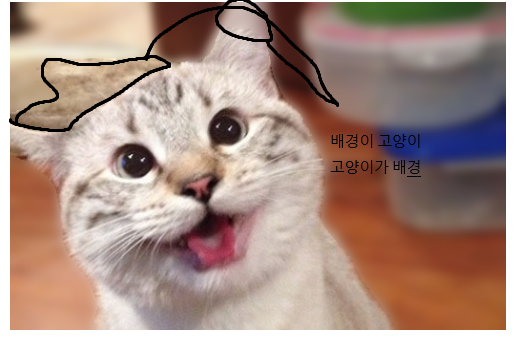

In [67]:
Image("output.png")

In [ ]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]

In [ ]:
model = deeplabv3_resnet101(pretrained=True).eval()

In [ ]:
transform = T.Compose([
    T.ToPILImage(),
    T.Resize((520, 520)),
    T.ToTensor(),
])

In [ ]:
img_path = "image.jpg"
img_orig = cv2.imread(img_path)
print(f"이미지 크기: {img_orig.shape}")

이미지 크기: (480, 640, 3)


In [ ]:
# RGB 변환 및 모델 입력
img_rgb = cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB)
input_tensor = transform(img_rgb).unsqueeze(0)

In [ ]:
with torch.no_grad():
    output = model(input_tensor)["out"][0]
    output_predictions = output.argmax(0).byte().cpu().numpy()

# 원본 크기로 리사이즈
output_predictions_resized = cv2.resize(
    output_predictions,
    (img_orig.shape[1], img_orig.shape[0]),
    interpolation=cv2.INTER_NEAREST
)


In [ ]:
seg_map = (output_predictions_resized == 15)
img_mask = seg_map.astype(np.uint8) * 255

In [ ]:
img_orig_blur = cv2.GaussianBlur(img_orig, (31, 31), 0)

# 마스크를 3채널로 변환
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

# 인물은 원본, 배경은 블러 적용
portrait_result = np.where(img_mask_color == 255, img_orig, img_orig_blur)

# 결과 저장 << 굳이 있어야할까
#cv2.imwrite("portrait_mode.jpg", portrait_result)


✓ 저장 완료: portrait_mode.jpg


(np.float64(-0.5), np.float64(639.5), np.float64(479.5), np.float64(-0.5))

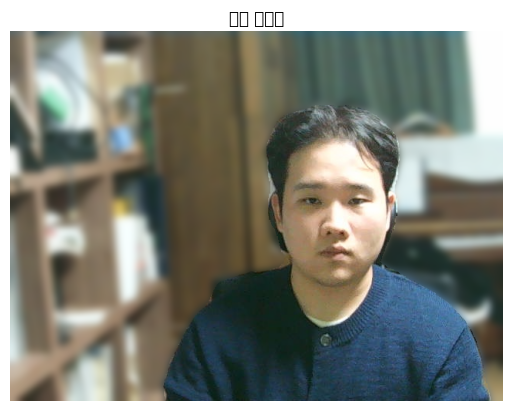

In [ ]:
plt.imshow(cv2.cvtColor(portrait_result, cv2.COLOR_BGR2RGB))
plt.title("아웃 포커싱")
plt.axis('off')

In [ ]:
cat_img_path = "cat.jpg"
cat_img = cv2.imread(cat_img_path)
print(f"이미지 크기: {cat_img.shape}")

# RGB 변환 및 모델 입력
cat_img_rgb = cv2.cvtColor(cat_img, cv2.COLOR_BGR2RGB)
input_tensor_cat = transform(cat_img_rgb).unsqueeze(0)

# 세그멘테이션 추론
with torch.no_grad():
    output_cat = model(input_tensor_cat)["out"][0]
    output_predictions_cat = output_cat.argmax(0).byte().cpu().numpy()

# 원본 크기로 리사이즈
output_predictions_cat_resized = cv2.resize(
    output_predictions_cat,
    (cat_img.shape[1], cat_img.shape[0]),
    interpolation=cv2.INTER_NEAREST
)

이미지 크기: (343, 519, 3)


In [ ]:
seg_map_cat = (output_predictions_cat_resized == 8)
cat_mask = seg_map_cat.astype(np.uint8) * 255

# 배경 블러 처리
cat_img_blur = cv2.GaussianBlur(cat_img, (31, 31), 0)

# 마스크를 3채널로 변환
cat_mask_color = cv2.cvtColor(cat_mask, cv2.COLOR_GRAY2BGR)

# 고양이는 원본, 배경은 블러 적용
animal_result = np.where(cat_mask_color == 255, cat_img, cat_img_blur)

# 결과 저장
#cv2.imwrite("animal_blur.jpg", animal_result)

(np.float64(-0.5), np.float64(518.5), np.float64(342.5), np.float64(-0.5))

/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50577 (\N{HANGUL SYLLABLE YANG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47932 (\N{HANGUL SYLLABLE MUL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missin

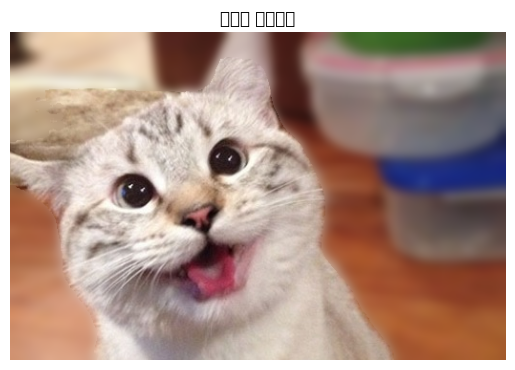

In [ ]:
plt.imshow(cv2.cvtColor(animal_result, cv2.COLOR_BGR2RGB))
plt.title("고양이 인물사진")
plt.axis('off')

In [ ]:
subject_img_path = "cat.jpg"
background_img_path = "sand.jpg"

subject_img = cv2.imread(subject_img_path)
background_img = cv2.imread(background_img_path)

print(f"객체 이미지 크기: {subject_img.shape}")
print(f"배경 이미지 크기: {background_img.shape}")

# RGB 변환 및 모델 입력
subject_img_rgb = cv2.cvtColor(subject_img, cv2.COLOR_BGR2RGB)
input_tensor_subject = transform(subject_img_rgb).unsqueeze(0)

# 세그멘테이션 추론
with torch.no_grad():
    output_subject = model(input_tensor_subject)["out"][0]
    output_predictions_subject = output_subject.argmax(0).byte().cpu().numpy()

# 원본 크기로 리사이즈
output_predictions_subject_resized = cv2.resize(
    output_predictions_subject,
    (subject_img.shape[1], subject_img.shape[0]),
    interpolation=cv2.INTER_NEAREST
)

# 고양이(cat) 클래스 마스크 생성 (클래스 ID = 8)
seg_map_subject = (output_predictions_subject_resized == 8)
subject_mask = seg_map_subject.astype(np.uint8) * 255

# 배경 이미지를 객체 이미지 크기에 맞춤
background_resized = cv2.resize(
    background_img,
    (subject_img.shape[1], subject_img.shape[0])
)

# 마스크를 3채널로 변환
subject_mask_color = cv2.cvtColor(subject_mask, cv2.COLOR_GRAY2BGR)

# 객체는 원본, 배경은 새 배경으로 교체
chroma_result = np.where(subject_mask_color == 255, subject_img, background_resized)


객체 이미지 크기: (343, 519, 3)
배경 이미지 크기: (2000, 3000, 3)


(np.float64(-0.5), np.float64(518.5), np.float64(342.5), np.float64(-0.5))

/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53356 (\N{HANGUL SYLLABLE KEU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47560 (\N{HANGUL SYLLABLE MA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53412 (\N{HANGUL SYLLABLE KI}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53356 (\N{HANGUL SYLLABLE KEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47196 (\N

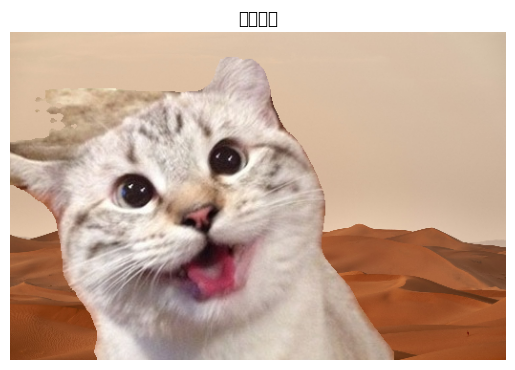

In [ ]:
plt.imshow(cv2.cvtColor(chroma_result, cv2.COLOR_BGR2RGB))
plt.title("크로마키")
plt.axis('off')

In [ ]:
subject_img_path = "image.jpg"
background_img_path = "sand.jpg"

subject_img = cv2.imread(subject_img_path)
background_img = cv2.imread(background_img_path)

print(f"객체 이미지 크기: {subject_img.shape}")
print(f"배경 이미지 크기: {background_img.shape}")

# RGB 변환 및 모델 입력
subject_img_rgb = cv2.cvtColor(subject_img, cv2.COLOR_BGR2RGB)
input_tensor_subject = transform(subject_img_rgb).unsqueeze(0)

# 세그멘테이션 추론
with torch.no_grad():
    output_subject = model(input_tensor_subject)["out"][0]
    output_predictions_subject = output_subject.argmax(0).byte().cpu().numpy()

# 원본 크기로 리사이즈
output_predictions_subject_resized = cv2.resize(
    output_predictions_subject,
    (subject_img.shape[1], subject_img.shape[0]),
    interpolation=cv2.INTER_NEAREST
)

# 사람(person) 클래스 마스크 생성 (클래스 ID = 15)
seg_map_subject = (output_predictions_subject_resized == 15)
subject_mask = seg_map_subject.astype(np.uint8) * 255

# 배경 이미지를 객체 이미지 크기에 맞춤
background_resized = cv2.resize(
    background_img,
    (subject_img.shape[1], subject_img.shape[0])
)

# 마스크를 3채널로 변환
subject_mask_color = cv2.cvtColor(subject_mask, cv2.COLOR_GRAY2BGR)

# 객체는 원본, 배경은 새 배경으로 교체
chroma_result = np.where(subject_mask_color == 255, subject_img, background_resized)


객체 이미지 크기: (480, 640, 3)
배경 이미지 크기: (2000, 3000, 3)


(np.float64(-0.5), np.float64(639.5), np.float64(479.5), np.float64(-0.5))

/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53356 (\N{HANGUL SYLLABLE KEU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47560 (\N{HANGUL SYLLABLE MA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53412 (\N{HANGUL SYLLABLE KI}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) mis

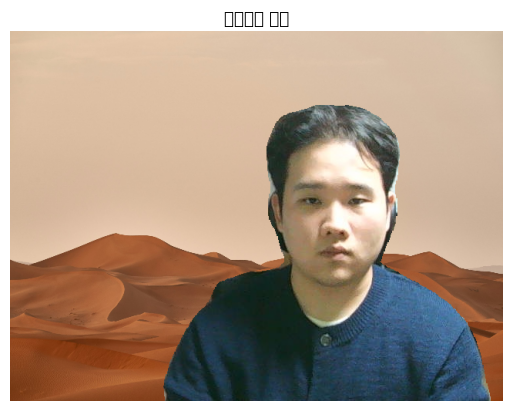

In [ ]:
plt.imshow(cv2.cvtColor(chroma_result, cv2.COLOR_BGR2RGB))
plt.title("크로마키 결과")
plt.axis('off')

